In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
#from gprm.utils import pmag
from gprm.utils.create_gpml import gdf2gpml, gpml2gdf
from gprm.datasets import Reconstructions

import matplotlib as mpl
import matplotlib.gridspec as gridspec

%matplotlib inline
%load_ext autoreload
%autoreload 2

mpl.rc('font',family='Helvetica')
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2


In [2]:
#import pygplates
#tmp = pygplates.FeatureCollection('/Users/simon/GIT/pmag/T2012_all_vgps.gpml')

t12 = pd.read_excel('/Users/simon/Data/Paleomag/Torsvik/Torsvik2012.xls')

t12['PlateGroup'] = t12.PLATENAM

ind = t12.PLATENAM.isin(['PAR','COL','PAT','AMA'])
t12.loc[ind,'Continent'] = 'South America'

ind = t12.PLATENAM.isin(['NAM','GRN'])
t12.loc[ind,'Continent'] = 'North America'

ind = t12.PLATENAM.isin(['EUR'])
t12.loc[ind,'Continent'] = 'Eurasia'

ind = t12.PLATENAM.isin(['AUS','ANT'])
t12.loc[ind,'Continent'] = 'Australia-Antarctica'

ind = t12.PLATENAM.isin(['SAF','NWA','NEA','MAD','ARA','SOM','MES'])
t12.loc[ind,'Continent'] = 'Africa-Arabia'

ind = t12.PLATENAM.isin(['IND'])
t12.loc[ind,'Continent'] = 'India'

#ind = t12.PLATENAM.isin(['ANT'])
#t12.loc[ind,'Continent'] = 'Antarctica'

print(t12.Continent.unique())


['North America' 'Eurasia' 'South America' 'Africa-Arabia' 'India'
 'Australia-Antarctica']


In [115]:
M2021 = Reconstructions.fetch_Merdith2021()

'''
paleomagia = pd.read_csv('../data/list_2022-05-13_16-07.csv', on_bad_lines='warn')
paleomagia = gpd.GeoDataFrame(paleomagia, geometry=gpd.points_from_xy(paleomagia.Slon, paleomagia.Slat), crs=4326)
paleomagia = paleomagia[paleomagia.AV>=4]
# This is a trick to get the longitudes within -180/180 (instead of 0/360)
paleomagia = gpml2gdf(gdf2gpml(paleomagia))
M2021_pm = M2021.assign_plate_ids(paleomagia)
'''

evans_GradeA = pd.read_excel('../data/Evans++_Poles.xlsx', sheet_name='GradeA')
evans_GradeB = pd.read_excel('../data/Evans++_Poles.xlsx', sheet_name='GradeB')

evans_GradeAB = pd.concat([evans_GradeA, evans_GradeB])


evans_GradeAB = evans_GradeAB.rename(columns={'Nominal age': 'Age'})
evans_GradeAB = gpd.GeoDataFrame(evans_GradeAB, geometry=gpd.points_from_xy(evans_GradeAB.SLONG, evans_GradeAB.SLAT), crs=4326)
evans_GradeAB = gpml2gdf(gdf2gpml(evans_GradeAB))
M2021_pm = M2021.assign_plate_ids(evans_GradeAB)



M2021_pm['Continent'] = 'Other'

'''
ind = M2021_pm.PLATEID1.isin([201, 22601, 22043, 22042, 22054])
M2021_pm.loc[ind,'Continent'] = 'South America'

ind = M2021_pm.PLATEID1.isin([101, 121, 184, 108])
M2021_pm.loc[ind,'Continent'] = 'North America'

ind = M2021_pm.PLATEID1.isin([302, 311, 315, 340])
M2021_pm.loc[ind,'Continent'] = 'Eurasia'

ind = M2021_pm.PLATEID1.isin([801, 8011, 8024, 8030])
M2021_pm.loc[ind,'Continent'] = 'Australia-Antarctica'

ind = M2021_pm.PLATEID1.isin([704, 709, 712, 714, 77012, 77142, 77030])
M2021_pm.loc[ind,'Continent'] = 'Africa-Arabia'

ind = M2021_pm.PLATEID1.isin([501])
M2021_pm.loc[ind,'Continent'] = 'India'
'''
#print(M2021_pm.PLATEID1.unique())
print(M2021_pm.Craton.unique())

ind = M2021_pm.Craton.isin(['Amazonia','Amazonia−Guapore','Amazonia−Guyana','Rio de la Plata','Sao Francisco'])
M2021_pm.loc[ind,'Continent'] = 'South America'

ind = M2021_pm.Craton.isin(['Laurentia','Laurentia−Superior(East)','Laurentia−Superior(West)','Laurentia−Superior',
                            'Laurentia−Slave','Laurentia−Greenland','Laurentia−Greenland−Nain','Laurentia−Rae',
                            'Laurentia−Wyoming','Laurentia−Scotland','Laurentia−Svalbard','Laurentia−Trans-Hudson orogen'])
M2021_pm.loc[ind,'Continent'] = 'North America'

ind = M2021_pm.Craton.isin(['Baltica', 'Baltica−Fennoscandia', 'Baltica−Sarmatia', 'Baltica−Fennoscandia−Karelia'])
M2021_pm.loc[ind,'Continent'] = 'Eurasia'

ind = M2021_pm.Craton.isin(['Australia−N', 'Australia−S', 'Australia−W', 'Australia−W−Pilbara', 'Australia−W−Yilgarn'])
M2021_pm.loc[ind,'Continent'] = 'Australia-Antarctica'

ind = M2021_pm.Craton.isin(['Kalahari','Kalahari−Kaapvaal','Kalahari−Zimbabwe','West Africa','Congo'])
M2021_pm.loc[ind,'Continent'] = 'Africa-Arabia'

ind = M2021_pm.Craton.isin(['India','India−South','India−South−Dharwar','India−North','India−South−Singhbhum'])
M2021_pm.loc[ind,'Continent'] = 'India'



['Amazonia' 'Amazonia−Guapore' 'Amazonia−Guyana' 'Australia−N'
 'Australia−S' 'Australia−W' 'Australia−W−Pilbara' 'Australia−W−Yilgarn'
 'Baltica' 'Baltica−Fennoscandia' 'Baltica−Sarmatia'
 'Baltica−Fennoscandia−Karelia' 'Congo' 'India' 'India−South'
 'India−South−Dharwar' 'Kalahari' 'Kalahari−Kaapvaal' 'Kalahari−Zimbabwe'
 'Laurentia' 'Laurentia−Superior(East)' 'Laurentia−Superior(West)'
 'Laurentia−Superior' 'Laurentia−Slave' 'Laurentia−Greenland'
 'Laurentia−Greenland−Nain' 'Laurentia−Rae' 'Laurentia−Wyoming'
 'North China' 'Rio de la Plata' 'Sao Francisco' 'Siberia−east−Aldan'
 'Siberia−west' 'Siberia−west−Akitkan' 'South China' 'Tarim' 'Coats Land'
 'India−North' 'India−South−Singhbhum' 'Kalahari−Grunehogna'
 'Laurentia−Scotland' 'Laurentia−Svalbard' 'Laurentia−Trans-Hudson orogen'
 'Siberia−east' 'Siberia−west−Tungus' 'West Africa']


In [5]:
plith = pd.DataFrame(gpd.read_file('../data/boucot_paleolithology_combined.shp'))

'''
lith_code_dict = OrderedDict([
        ('T','Tillite'),
        ('D','Dropstone'),
        ('G','Glendonite'),
        ('C','Coal'),
        ('PA','Palm'),
        ('M','Mangrove'),
        ('CR','Crocodilians'),
        ('E','Evaporite'),
        ('CA','Calcrete'),
        ('B','Bauxite'),
        ('L','Laterite'),
        ('K','Kaolinite'),
        ('O','Oolitic ironstones')
    ])
'''

print(plith.columns)
print(plith.LithCode.unique())

ind = plith.LithCode.isin(['T','D','G','C','E'])
plith_select = plith[ind]

plith_select['LithologyGroup'] = plith_select['LithCode']
plith_select.loc[plith_select['LithCode'].isin(['T','D','G']), 'LithologyGroup'] = 'Glacial Deposits'
plith_select.loc[plith_select['LithCode'].isin(['C']), 'LithologyGroup'] = 'Coals'
plith_select.loc[plith_select['LithCode'].isin(['E']), 'LithologyGroup'] = 'Evaporites'


#ind = plith.LithCode.isin(['])
#plith.loc[ind,'Continent'] = 'South America'

Index(['LithCode', 'LithID', 'GeogComm', 'Continent', 'Country', 'LMU',
       'Period', 'Stage', 'AgeComm', 'Lithology', 'Formation', 'LithComm',
       'PrimRef', 'SeeAlso', 'PLATEID1', 'FROMAGE', 'TOAGE', 'NAME', 'DESCR',
       'PLATEID2', 'GPGIM_TYPE', 'FEATURE_ID', 'RECON_METH', 'L_PLATE',
       'R_PLATE', 'SPREAD_ASY', 'TYPE', 'geometry'],
      dtype='object')
['E' 'C' 'B' 'K' 'CA' 'O' 'T' 'D' 'L' 'G' 'I' 'LF' 'CR' 'PA' 'H' 'M']


/var/folders/k2/jz_0twls1q13vbr87bqwdtr40000gn/T/ipykernel_21329/4701509.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plith_select['LithologyGroup'] = plith_select['LithCode']


In [6]:
df = pd.read_csv('../data/Condie++_2015.txt',
                 delimiter='\t', )

df.sort_values(by=['Termination deformation (Ma)'], inplace=True, ignore_index=True)

accretionary = df[df['Type (accretion acc; collision, coll)']=='acc']
collisional = df[df['Type (accretion acc; collision, coll)']=='coll']

PassiveMargins1 = pd.read_csv('../data/Bradley_table1.csv', encoding = "ISO-8859-1")
PassiveMargins2 = pd.read_csv('../data/Bradley_table2_certain.csv', encoding = "ISO-8859-1")

#LIPs = pd.read_csv('/Users/simon/GIT/pygplates-rifts/LIPs/LIPs_TimeAreaVolume_Ernst2014.csv', encoding = "ISO-8859-1")
CLIPs = pd.read_excel('../data/Continental_LIPs_2020046_TableDR3.xls', 
                      sheet_name='Table_3')
OLIPs = pd.read_excel('../data/OceanicLIPs_2020046_TableDR2.xls', 
                      sheet_name='Table_S2')

def get_geological_events(TimeArray):
    StepSize = np.diff(TimeArray)[0]

    CollisionalCount = []
    for time in TimeArray:

        valid_collisions = collisional[(collisional['Onset deformation (Ma)']>=time) 
                                       & (collisional['Termination deformation (Ma)']<=time)]
        CollisionalCount.append(len(valid_collisions))

    AccretionaryCount = []
    for time in TimeArray:

        valid_accretion = accretionary[(accretionary['Onset deformation (Ma)']>=time) 
                                       & (accretionary['Termination deformation (Ma)']<=time)]
        AccretionaryCount.append(len(valid_accretion))

    PassiveMarginsCount = []
    for time in TimeArray:    
        #valid_margins1 = PassiveMargins1[(PassiveMargins1['Oldest_age']>=time) & (PassiveMargins1['Oldest_age']<=time+StepSize)]
        valid_margins1 = PassiveMargins1[(PassiveMargins1['Youngest_age']>=time) & (PassiveMargins1['Youngest_age']<=time+StepSize)]
        #valid_margins1 = PassiveMargins1[(PassiveMargins1['Oldest_age']>=time) & (PassiveMargins1['Youngest_age']<=time)]
        valid_margins2 = PassiveMargins2[(PassiveMargins2['Start date (Ma)']>=time) & (PassiveMargins2['Start date (Ma)']<=time+StepSize)]
        PassiveMarginsCount.append(len(valid_margins1)+len(valid_margins2))

    CLIPCount = []
    for time in TimeArray: 
        valid_CLIPs = CLIPs[(CLIPs['Age']>=time) & (CLIPs['Age']<time+StepSize)]  
        CLIPCount.append(len(valid_CLIPs))

    OLIPCount = []
    for time in TimeArray: 
        valid_OLIPs = OLIPs[(OLIPs['Age']>=time) & (OLIPs['Age']<time+StepSize)]  
        OLIPCount.append(len(valid_OLIPs))


    geological_events = pd.DataFrame([CollisionalCount,AccretionaryCount,PassiveMarginsCount,CLIPCount,OLIPCount], 
                                     columns=TimeArray, index=['Collisional Orogens', 'Accretionary Orogens', 'PassiveMargins','Continental LIPs','Oceanic LIPs'])
    
    return geological_events

In [7]:
from gprm.datasets import Strat

pbdb = Strat.pbdb()

pbdb = Strat.pbdb_elevation_mapping(pbdb)

pbdb['env'] = 'Marine'
pbdb.loc[pbdb['elevation_max']>0, 'env'] = 'Terrestrial'
pbdb['Age'] = (pbdb['max_ma'] + pbdb['min_ma'])/2.


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/datasets/Strat.py:107: DtypeWarning: Columns (14,21,22,23,24,25,26,27,30,33,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,81) have mixed types. Specify dtype option on import or set low_memory=False.
  df = _pd.read_csv(path_to_pbdb_data, delimiter=',', skiprows=14)


In [8]:
from gprm.datasets import Rocks

gc = Rocks.Geochem()


In [9]:
met = Rocks.Metamorphism()

#met['T/P_TYPE'].value_counts()

In [10]:
from gprm.datasets import Zircons

df_SampleDetails, df_Data = Zircons.loadDB(version=2018)

zircons = pd.merge(df_SampleDetails,df_Data,on='Sample Key')
zircons = zircons.drop(zircons[zircons['Class-1 Rock Type'].str.contains('misc')].index)


/opt/anaconda3/envs/pygmt7/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [11]:
dp_list = []
for deposit_type in ['PbZn-CD', 'PbZn-MVT', 'Cu-sed', 'VMS', 'Cu-por']:
    ores = Rocks.BaseMetalDeposits(deposit_type=deposit_type)
    ores['deposit_type'] = deposit_type
    dp_list.append(ores)
    
ores_cat = pd.concat(dp_list)
    

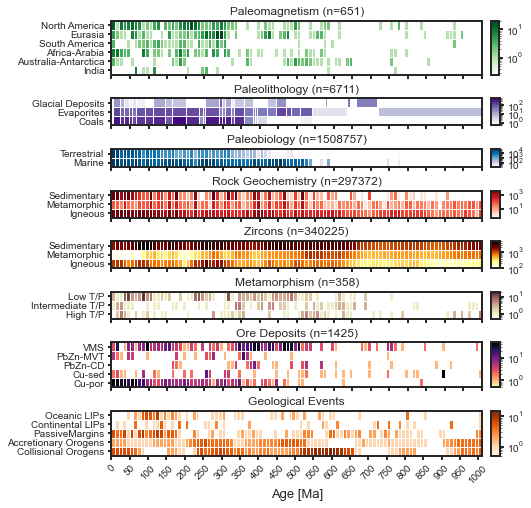

In [119]:
sns.set_style("white")
sns.set_style("ticks", {"xtick.major.size": 5, "ytick.major.size": 5})
#plt.rcParams["axes.axisbelow"] = False


linewidth=0.5
linecolor = [0.2, 0.2, 0.2]
edgecolor = 'white'
edgewidth = 0.5
ytickfontsize = 10
titlefontsize = 12

gs_start = 3
axes_spacing = 2

binsize = 10
bins = np.arange(0,1000.1,binsize)



fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(nrows=8, ncols=1, wspace=0.2, hspace=.7, height_ratios=[6,3,2,3,3,3,5,5])

#############################################################
t12_binned = t12.groupby(['Continent', pd.cut(t12['Age'], bins=bins)])
t12_heatmap = t12_binned.size().unstack()
t12_heatmap = t12_heatmap.reindex(['North America', 'Eurasia', 'South America', 'Africa-Arabia', 'Australia-Antarctica', 'India'][::-1])

pm_binned = M2021_pm.groupby(['Continent', pd.cut(M2021_pm['Age'], bins=bins)])
pm_heatmap = pm_binned.size().unstack()
pm_heatmap = pm_heatmap.reindex(['North America', 'Eurasia', 'South America', 'Africa-Arabia', 'Australia-Antarctica', 'India'][::-1])

nrows = pm_heatmap.shape[0]
ax = fig.add_subplot(gs[0])

p = ax.pcolormesh(np.array(pm_heatmap), edgecolors=edgecolor, linewidth=edgewidth,
                    norm=colors.LogNorm(vmin=.25, vmax=20.), cmap='Greens')
p = ax.pcolormesh(np.array(t12_heatmap), edgecolors=edgecolor, linewidth=edgewidth, 
                    norm=colors.LogNorm(vmin=.25, vmax=20.), cmap='Greens')
#ax21.grid()
ax.set_xticks((bins[::5])/binsize)
ax.set_xticklabels([])
#ax21.set_xticklabels([str(num) for num in bins[::5]], rotation=45.)
ax.set_yticks([])
ax.set_yticks(np.arange(len(t12_heatmap.index))+0.5) 
ax.set_yticklabels(t12_heatmap.index, fontsize=ytickfontsize)
#ax.tick_params(axis='both', which='both', color=linecolor, width=linewidth)
#ax21.spines['left'].set_visible(False)
plt.colorbar(p, ax=ax, aspect=7, pad=0.02)
ax.set_title('Paleomagnetism (n={:d})'.format(int(t12_heatmap.sum().sum() + pm_heatmap.sum().sum())), fontsize=titlefontsize)


##############################################################################
lithbins = np.sort(plith_select.FROMAGE.unique())
lithbins = np.insert(lithbins, 0, 5.3)

plith_binned = plith_select.groupby(['LithologyGroup', pd.cut(plith_select['TOAGE'], bins=lithbins)])
plith_heatmap = plith_binned.size().unstack()

# After Hoffman et al, 2017; Li et al, 2013
neoglacial_bins = [541,577,583,635,645,659,717,720,1000]
neoglacial_heatmap = np.array([0,15,0,48,0,39,0,0],)

# After Evans, 2006
neoevap_bins = [541,635,720,1000]
neoevap_heatmap = np.array([2,0,7],)

nrows = plith_heatmap.shape[0]
ax = fig.add_subplot(gs[1])

p = ax.pcolormesh(lithbins, np.arange(0,4,1), plith_heatmap, cmap='Purples', linewidth=edgewidth,
                    edgecolors=edgecolor, norm=colors.LogNorm(vmin=.5, vmax=600.))
p = ax.pcolormesh(neoglacial_bins, np.arange(2,4,1), [neoglacial_heatmap], cmap='Purples', linewidth=edgewidth,
                    edgecolors=edgecolor, norm=colors.LogNorm(vmin=.5, vmax=600.))
p = ax.pcolormesh(neoevap_bins, np.arange(1,3,1), [neoevap_heatmap], cmap='Purples', linewidth=edgewidth,
                    edgecolors=edgecolor, norm=colors.LogNorm(vmin=.5, vmax=600.))
ax.set(xlabel=None, ylabel=None)
ax.set_xlim(bins.min(), bins.max())
ax.set_xticks((bins[::5]))
ax.set_xticklabels([])
ax.set_yticks([])
#ax.tick_params(axis='both', which='both', color=linecolor, width=linewidth)
ax.set_yticks(np.arange(len(plith_heatmap.index))+0.5, minor=False) 
ax.set_yticklabels(plith_heatmap.index, fontsize=ytickfontsize)
plt.colorbar(p, ax=ax, aspect=3, pad=0.02)
ax.set_title('Paleolithology (n={:d})'.format(plith_heatmap.sum().sum() + neoevap_heatmap.sum() + neoglacial_heatmap.sum()), fontsize=titlefontsize)


##############################################################################
pbdb_binned = pbdb.groupby(['env', pd.cut(pbdb['Age'], bins=bins)])
pbdb_heatmap = pbdb_binned.size().unstack()

nrows = pbdb_heatmap.shape[0]
ax = fig.add_subplot(gs[2])

p = ax.pcolormesh(np.array(pbdb_heatmap), edgecolors=edgecolor, linewidth=edgewidth, 
                    norm=colors.LogNorm(vmin=20, vmax=50000.), cmap='PuBu')
ax.set_xticks((bins[::5])/binsize)
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticks(np.arange(len(pbdb_heatmap.index))+0.5, minor=False) 
ax.set_yticklabels(pbdb_heatmap.index, fontsize=ytickfontsize)
ax.set_title('')
plt.colorbar(p, ax=ax, aspect=2, pad=0.02)
ax.set_title('Paleobiology (n={:d})'.format(pbdb_heatmap.sum().sum()), fontsize=titlefontsize)


##############################################################################
gc_binned = gc.groupby(['rock_group', pd.cut(gc['age'], bins=bins)])
gc_heatmap = gc_binned.size().unstack()
gc_heatmap = gc_heatmap.rename(index={'sedimentary': 'Sedimentary', 'igneous': 'Igneous', 'metamorphic': 'Metamorphic'})

nrows = gc_heatmap.shape[0]
ax = fig.add_subplot(gs[3])

p = ax.pcolormesh(np.array(gc_heatmap), edgecolors=edgecolor, linewidth=edgewidth, 
                    norm=colors.LogNorm(vmin=.5, vmax=4000.), cmap='Reds')
ax.set_xticks((bins[::5])/binsize)
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticks(np.arange(len(gc_heatmap.index))+0.5, minor=False) 
ax.set_yticklabels(gc_heatmap.index, fontsize=ytickfontsize)
plt.colorbar(p, ax=ax, aspect=3, pad=0.02)
ax.set_title('Rock Geochemistry (n={:d})'.format(gc_heatmap.sum().sum()), fontsize=titlefontsize)


##############################################################################
zircons['HeatmapGroup'] = 'Sedimentary'
zircons.loc[zircons['Class-2 Rock Type'].str.contains('meta'), 'HeatmapGroup'] = 'Metamorphic'
zircons.loc[zircons['Class-2 Rock Type'].str.contains('intrusive'), 'HeatmapGroup'] = 'Igneous'
zircons.loc[zircons['Class-2 Rock Type'].str.contains('extrusive'), 'HeatmapGroup'] = 'Igneous'

zircons_binned = zircons.groupby(['HeatmapGroup', pd.cut(zircons['206Pb_238U_Age_Ma'], bins=bins)])
zircons_heatmap = zircons_binned.size().unstack()

nrows = zircons_heatmap.shape[0]
ax = fig.add_subplot(gs[4])

p = ax.pcolormesh(np.array(zircons_heatmap), edgecolors=edgecolor, linewidth=edgewidth, 
               norm=colors.LogNorm(vmin=100, vmax=5000.), cmap='afmhot_r')
ax.set_xticks((bins[::5])/binsize)
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticks(np.arange(len(zircons_heatmap.index))+0.5, minor=False) 
ax.set_yticklabels(zircons_heatmap.index, fontsize=ytickfontsize)
plt.colorbar(p, ax=ax, aspect=3, pad=0.02)
ax.set_title('Zircons (n={:d})'.format(zircons_heatmap.sum().sum()), fontsize=titlefontsize)


##############################################################################
met_binned = met.groupby(['T/P_TYPE', pd.cut(met['Age'], bins=bins)])
met_heatmap = met_binned.size().unstack()
met_heatmap = met_heatmap.rename(index={'HIGH': 'High T/P', 'INT': 'Intermediate T/P', 'LOW': 'Low T/P'})


nrows = met_heatmap.shape[0]
ax = fig.add_subplot(gs[5])

p = ax.pcolormesh(np.array(met_heatmap), edgecolors=edgecolor, linewidth=edgewidth, 
               norm=colors.LogNorm(vmin=.5, vmax=20.), cmap='pink_r')
ax.set_xticks((bins[::5])/binsize)
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticks(np.arange(len(met_heatmap.index))+0.5, minor=False) 
ax.set_yticklabels(met_heatmap.index, fontsize=ytickfontsize)
plt.colorbar(p, ax=ax, aspect=3, pad=0.02)
ax.set_title('Metamorphism (n={:d})'.format(met_heatmap.sum().sum()), fontsize=titlefontsize)



##############################################################################
ores_binned = ores_cat.groupby(['deposit_type', pd.cut(ores_cat['Age'], bins=bins)])
ores_heatmap = ores_binned.size().unstack()

nrows = ores_heatmap.shape[0]
ax = fig.add_subplot(gs[6])

p = ax.pcolormesh(np.array(ores_heatmap), edgecolors=edgecolor, linewidth=edgewidth, 
               norm=colors.LogNorm(vmin=.5, vmax=50.), cmap='magma_r')
ax.set_xticks((bins[::5])/binsize)
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticks(np.arange(len(ores_heatmap.index))+0.5, minor=False) 
ax.set_yticklabels(ores_heatmap.index, fontsize=ytickfontsize)
plt.colorbar(p, ax=ax, aspect=5, pad=0.02)
ax.set_title('Ore Deposits (n={:d})'.format(ores_heatmap.sum().sum()), fontsize=titlefontsize)



geological_events = get_geological_events(bins)

nrows = np.array(geological_events).shape[0]
ax = fig.add_subplot(gs[7])

p = ax.pcolormesh(np.array(geological_events), edgecolors=edgecolor, linewidth=edgewidth, 
                    norm=colors.LogNorm(vmin=.5, vmax=15.), cmap='Oranges')
ax.set_xticks((bins[::5])/binsize)
ax.set_xticklabels([str(int(num)) for num in bins[::5]], rotation=45., fontsize=ytickfontsize)
ax.set_yticks([])
ax.set_yticks(np.arange(len(geological_events.index))+0.5, minor=False) 
ax.set_yticklabels(geological_events.index, fontsize=ytickfontsize)

#ax.tick_params(axis='both', which='both', color=linecolor, width=linewidth)
ax.yaxis.grid(False, which='major')
ax.yaxis.grid(True, which='minor')
#ax41.spines['left'].set_visible(False)
plt.colorbar(p, ax=ax, aspect=5, pad=0.02)
ax.set_title('Geological Events', fontsize=titlefontsize)

ax.set_xlabel('Age [Ma]', fontsize=13)


plt.savefig('./ReconstructionBasisDataContinents.pdf', bbox_inches='tight')
plt.show()


In [60]:
plith_binned

neoglacial_bins = [541,577,583,635,645,659,717,720,1000]
neoglacial_heatmap = np.array([0,15,0,48,0,39,0,0],)

neoevap_bins = [541,635,720,1000]
neoevap_heatmap = np.array([2,0,7],)


array([  5.3,  23. ,  33.9,  47.8,  56. ,  66. ,  89.8, 113. , 145. ,
       164. , 201. , 237. , 247. , 252. , 290. , 299. , 307. , 323. ,
       331. , 359. , 383. , 388. , 393. , 419. , 444. , 470. , 485. ,
       509. , 541. ])

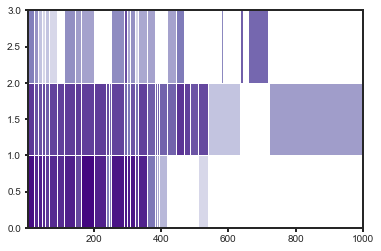

In [61]:
# After Hoffman et al, 2017 we have 
# Sturtian, 717-659, n=39
# Marinoan, 645=635, n=48
# Gaskiers, 

plt.pcolormesh(lithbins, np.arange(0,4,1), plith_heatmap, cmap='Purples', linewidth=edgewidth,
                    edgecolors=edgecolor, norm=colors.LogNorm(vmin=.1, vmax=600.))
plt.pcolormesh(neoglacial_bins, np.arange(2,4,1), [neoglacial_heatmap], cmap='Purples', linewidth=edgewidth,
                    edgecolors=edgecolor, norm=colors.LogNorm(vmin=.1, vmax=600.))
plt.pcolormesh(neoevap_bins, np.arange(1,3,1), [neoevap_heatmap], cmap='Purples', linewidth=edgewidth,
                    edgecolors=edgecolor, norm=colors.LogNorm(vmin=.1, vmax=600.))
lithbins


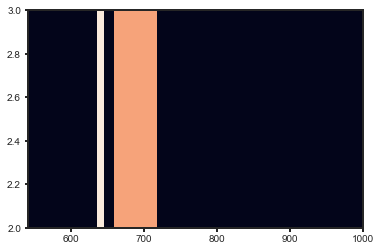

In [47]:
plt.pcolormesh(neoprot_bins,np.arange(2,4,1),[neoglacial_heatmap])

In [92]:
evans_GradeA = pd.read_excel('../data/Evans++_Poles.xlsx', sheet_name='GradeA')
evans_GradeB = pd.read_excel('../data/Evans++_Poles.xlsx', sheet_name='GradeB')

pd.concat([evans_GradeA, evans_GradeB])


,Craton,Rockname (component),GPMDB—result#,SLAT,SLONG,PLAT,PLONG,A95,Q1,Q2,...,R7,R,Nominal age,Min,Max,Reference (separate age ref when that antedates the most recent pmag study),Year,GPMDB−result#,Reference,"Principal shortcoming (with narrative if Q1,2,4,5 all satisfied)"
0,Amazonia,Fortuna Formation,9376,-15.0,300.0,59.8,155.9,9.0,1,1,...,0.0,4.0,1150,1143,1157,D’Agrella-Filho et al.,2008,NaN,NaN,NaN
1,Amazonia,Nova Floresta Formation,8827,-10.6,296.3,24.6,164.6,5.5,1,1,...,1.0,5.0,1200,1193,1207,Tohver et al.,2002,NaN,NaN,NaN
2,Amazonia−Guyana,Nova Guarita dykes,9361,-10.3,304.7,-47.9,245.9,6.6,1,1,...,0.0,6.0,1419,1415,1422,Bispo-Santos et al.,2012,NaN,NaN,NaN
3,Amazonia−Guyana,Avanavero mafic rocks,9499,4.0,300.0,-48.4,27.9,9.2,1,1,...,1.0,6.0,1789,1786,1791,Bispo-Santos et al.,2014a,NaN,NaN,NaN
4,Amazonia−Guyana,Velho Guilherme suite,9910,-6.6,308.0,31.1,40.1,9.0,1,1,...,1.0,7.0,1860,1840,1880,Antonio et al.,2017,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,South China,Yanbian “A” Dykes,NaN,26.9,101.5,45.1,130.4,19.0,1,1,...,NaN,NaN,824,818,820,NaN,2016,apx. 9526,Niu et al.,Q5
172,Tarim,Beiyixi (Baiyisi) Fm,NaN,41.6,86.5,-17.7,14.2,4.2,1,1,...,NaN,NaN,755,740,760,NaN,2005,9330,"Huang et al. (age: Xu et al., 2009)",Q4
173,West Africa,Djebel Boho—pole B2,NaN,30.4,353.3,27.3,27.1,14.9,1,1,...,NaN,NaN,536,526,547,NaN,2017,9902,Robert et al.,"Q5; also, complex magnetizations in study area"
174,West Africa,"Tadoughast and Fajjoud Formations, upper Ouarz...",NaN,30.2,352.2,21.9,31.0,15.6,1,1,...,NaN,NaN,561,551,572,NaN,2017,9901,Robert et al.,"Q5; also, complex magnetizations in study area"


<AxesSubplot:>

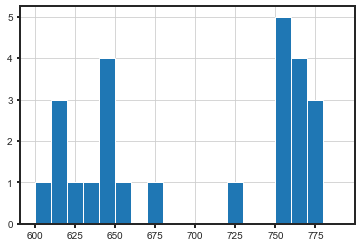

In [113]:
evans_GradeAB.Age.hist(bins=np.arange(600,800,10))

In [114]:
evans_GradeAB[(evans_GradeAB.Age>650) & (evans_GradeAB.Age<750)]

,Craton,Rockname (component),GPMDBâresult#,SLAT,SLONG,PLAT,PLONG,A95,Q1,Q2,...,DESCR,PLATEID2,GPGIM_TYPE,FEATURE_ID,RECON_METH,L_PLATE,R_PLATE,SPREAD_ASY,IMPORT_AGE,geometry
54,Laurentia,MEAN Franklin LIP—combined result,MEAN,73.0,275.4,6.7,162.1,3.0,1,1,...,None,None,gpml:UnclassifiedFeature,GPlates-2cfa74ba-f8e2-48ce-85b4-0aa1f46dc3fc,None,None,None,None,None,POINT (-84.60000 73.00000)
121,Tarim,Qiaoenbrak Fm,9525,40.9,79.5,6.3,197.5,8.6,0,1,...,None,None,gpml:UnclassifiedFeature,GPlates-44f3bfbe-d117-420a-9e08-650c738752eb,None,None,None,None,None,POINT (79.50000 40.90000)
